## Testing Heatmaps
through NBA API


In [3]:
import sys
from pathlib import Path
ROOT = Path.cwd().parent 
sys.path.append(str(ROOT / "src"))

from viz import court
from scripts import build_fg_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
season = "2015-16"
grids = build_fg_grid.build_league_contested_grids(season)


KeyError: 'CLOSE_DEF_DIST'

In [5]:
fg_matrix = pd.read_csv("league_fg_2015-16.csv", index_col=0).values


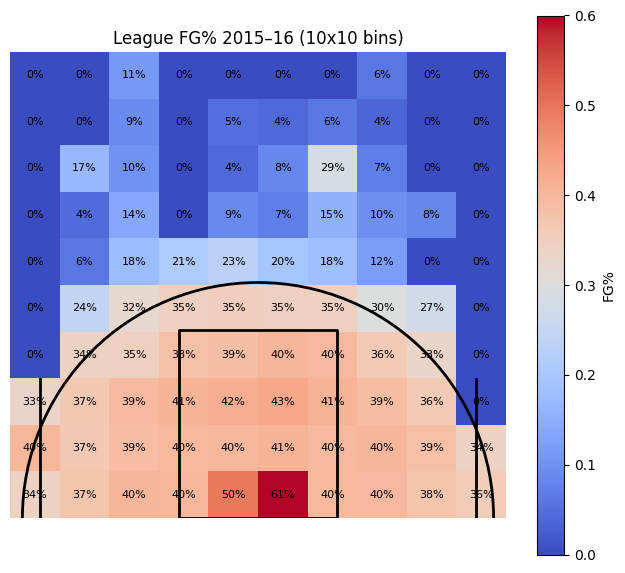

In [7]:
fig, ax = plt.subplots(figsize=(8, 7))

# Plot heatmap first
x_edges = np.linspace(-250, 250, fg_matrix.shape[1] + 1)
y_edges = np.linspace(0, 470, fg_matrix.shape[0] + 1)
pcm = ax.pcolormesh(x_edges, y_edges, fg_matrix, cmap='coolwarm', vmin=0, vmax=0.6)
plt.colorbar(pcm, ax=ax, label='FG%')

# Add numbers
for i in range(fg_matrix.shape[0]):
    for j in range(fg_matrix.shape[1]):
        if not np.isnan(fg_matrix[i,j]):
            ax.text(
                x_edges[j]+(x_edges[1]-x_edges[0])/2,
                y_edges[i]+(y_edges[1]-y_edges[0])/2,
                f"{fg_matrix[i,j]*100:.0f}%",
                ha='center', va='center', fontsize=8
            )

# Draw court last so it’s on top
draw_half_court(ax)

plt.title("League FG% 2015–16 (10x10 bins)")
plt.show()
